In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Deep Learning for small dataset and one ice location

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, 10)
        self.linear3 = torch.nn.Linear(10, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        h2_relu = self.linear2(h_relu).sigmoid()
        y_pred = self.linear3(h2_relu)
        return y_pred

## Training Script

In [2]:
import torch
import pandas as pd

# N is size of the training set; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H= 900, 5, 10

# Data
PT_data = pd.read_excel("../PTResults-1000.xlsx")
PT_tensor = torch.tensor(PT_data.values)

In [3]:
#Eventually change to batch training and shuffle what is training
import torchvision
import torch.utils.data
x_train, y_train = torch.utils.data.random_split(PT_tensor, [N, 1000-N])
x_train = PT_tensor[:N,1:6].float()
y_train = PT_tensor[:N,65].long()#.view(N,1)

x_test = PT_tensor[N:,1:6].float()
y_test = PT_tensor[N:,65].long()#.view(N,1)

D_out = 2#len(y_train[0,:])
print(2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

2
torch.Size([900, 5]) torch.Size([100, 5])
torch.Size([900]) torch.Size([100])


In [4]:
def train(model_init):# Construct our model by instantiating the class defined above
    model = model_init

    # Construct our loss function and an Optimizer. The call to model.parameters()
    # in the SGD constructor will contain the learnable parameters of the two
    # nn.Linear modules which are members of the model.
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
    for t in range(100):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(x_train)

        # Compute and print loss
        #print(y_pred.shape, y_train.shape)
        loss = criterion(y_pred, y_train)
        #print(t, loss.item())
        # Zero gradients, perform a backward pass, and update the weights.
        if t == 1:
            optimizer.param_groups[0]['lr'] = 0.01
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Test accuracy 
    
    #print(y_pred, y_train)
  
    #print(y_pred, y_train)
    correct_train = ((torch.argmax(y_pred,dim=-1)==y_train)).sum()
    acc_train = correct_train.float()/y_train.shape[0]

    y_hat = model(x_test)
    correct_test = (torch.argmax(y_hat,dim=-1)==y_test).sum()
    acc_test = correct_test.float()/y_test.shape[0]

    
    print('Training accuracy: ', acc_train.item())
    print('Testing accuracy: ', acc_test.item())
    return model,  acc_train.item(),acc_test.item()

In [5]:
# Run 1000 iterations of the training to get an average
accs_train = []
accs_test = []
for i in range(200):
    print('[Test number %i]' %(i))
    model_init = TwoLayerNet(D_in, H, D_out)
    model, acc_train, acc_test = train(model_init)
    accs_train.append(acc_train)
    accs_test.append(acc_test)

[Test number 0]
Training accuracy:  0.903333306312561
Testing accuracy:  0.8999999761581421
[Test number 1]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 2]
Training accuracy:  0.9055555462837219
Testing accuracy:  0.8700000047683716
[Test number 3]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 4]
Training accuracy:  0.902222216129303
Testing accuracy:  0.9100000262260437
[Test number 5]
Training accuracy:  0.9044444561004639
Testing accuracy:  0.8700000047683716
[Test number 6]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 7]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 8]
Training accuracy:  0.9044444561004639
Testing accuracy:  0.9100000262260437
[Test number 9]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 10]
Training accuracy:  0.903333306312561
Testing accuracy:

Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 90]
Training accuracy:  0.9011111259460449
Testing accuracy:  0.9100000262260437
[Test number 91]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 92]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 93]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 94]
Training accuracy:  0.8899999856948853
Testing accuracy:  0.8399999737739563
[Test number 95]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 96]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 97]
Training accuracy:  0.9044444561004639
Testing accuracy:  0.9100000262260437
[Test number 98]
Training accuracy:  0.9055555462837219
Testing accuracy:  0.8999999761581421
[Test number 99]
Training accuracy:  0.9055555462837219
Testing accuracy:  0.

Training accuracy:  0.903333306312561
Testing accuracy:  0.8899999856948853
[Test number 178]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 179]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6700000166893005
[Test number 180]
Training accuracy:  0.9055555462837219
Testing accuracy:  0.8899999856948853
[Test number 181]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 182]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 183]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 184]
Training accuracy:  0.903333306312561
Testing accuracy:  0.9200000166893005
[Test number 185]
Training accuracy:  0.6977777481079102
Testing accuracy:  0.6299999952316284
[Test number 186]
Training accuracy:  0.903333306312561
Testing accuracy:  0.8899999856948853
[Test number 187]
Training accuracy:  0.6977777481079102
Testing accura

(array([96.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  3., 21., 36., 42.]),
 array([0.63      , 0.65416666, 0.67833333, 0.7025    , 0.72666667,
        0.75083334, 0.77500001, 0.79916667, 0.82333334, 0.84750001,
        0.87166668, 0.89583335, 0.92000002]),
 <a list of 12 Patch objects>)

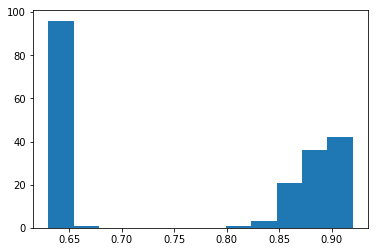

In [8]:
plt.hist(accs_test, bins=12)

In [9]:
## Now with non-zero one

In [10]:
import torch
import pandas as pd

# N is size of the training set; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H= 900, 5, 10

# Data
PT_data = pd.read_excel("../Data_Colleff_Entire (1).xlsx")
PT_tensor = torch.tensor(PT_data.values)

#Eventually change to batch training and shuffle what is training
import torchvision
import torch.utils.data
x_train, y_train = torch.utils.data.random_split(PT_tensor, [N, 1000-N])
x_train = PT_tensor[:N,1:6].float()
y_train = PT_tensor[:N,65].float()#.view(N,1)

x_test = PT_tensor[N:,1:6].float()
y_test = PT_tensor[N:,65].float()#.view(N,1)

In [11]:
D_out = 1#len(y_train[0,:])
print(2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

2
torch.Size([900, 5]) torch.Size([100, 5])
torch.Size([900]) torch.Size([100])


In [12]:
def train(model_init):# Construct our model by instantiating the class defined above
    model = model_init

    # Construct our loss function and an Optimizer. The call to model.parameters()
    # in the SGD constructor will contain the learnable parameters of the two
    # nn.Linear modules which are members of the model.
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-12)
    for t in range(100):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(x_train)

        # Compute and print loss
        #print(y_pred.shape, y_train.shape)
        loss = criterion(y_pred, y_train)
        #print(t, loss.item())
        # Zero gradients, perform a backward pass, and update the weights.
        if t == 1:
            optimizer.param_groups[0]['lr'] = 0.01
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Test accuracy 
    
    #print(y_pred, y_train)
  
    #print(y_pred, y_train)
    acc_train = criterion(y_pred,y_train)

    y_hat = model(x_test)
    acc_test = criterion(y_hat,y_test)

    
    print('Training loss: ', acc_train.item())
    print('Testing loss: ', acc_test.item())
    return model,  acc_train.item(),acc_test.item()




In [13]:

# Run 1000 iterations of the training to get an average
accs_train = []
accs_test = []
for i in range(200):
    print('[Test number %i]' %(i))
    model_init = TwoLayerNet(D_in, H, D_out)
    model, acc_train, acc_test = train(model_init)
    accs_train.append(acc_train)
    accs_test.append(acc_test)



[Test number 0]
Training loss:  0.008945977315306664
Testing loss:  0.008765904232859612
[Test number 1]
Training loss:  0.008884815499186516
Testing loss:  0.008683854714035988
[Test number 2]
Training loss:  0.008896964602172375
Testing loss:  0.00869775004684925
[Test number 3]
Training loss:  0.008884812705218792
Testing loss:  0.008683412335813046
[Test number 4]
Training loss:  0.00888502225279808
Testing loss:  0.008683934807777405
[Test number 5]
Training loss:  0.008886461146175861
Testing loss:  0.008686529472470284
[Test number 6]
Training loss:  0.009460845030844212
Testing loss:  0.009289240464568138
[Test number 7]
Training loss:  0.008935513906180859
Testing loss:  0.008694657124578953
[Test number 8]
Training loss:  0.008884812705218792
Testing loss:  0.00868341512978077
[Test number 9]
Training loss:  0.008884812705218792
Testing loss:  0.008683279156684875
[Test number 10]
Training loss:  0.008945099078118801
Testing loss:  0.008723118342459202
[Test number 11]
Traini

Training loss:  0.008884812705218792
Testing loss:  0.008683411404490471
[Test number 93]
Training loss:  0.008884823881089687
Testing loss:  0.008684677071869373
[Test number 94]
Training loss:  0.008884812705218792
Testing loss:  0.008683303371071815
[Test number 95]
Training loss:  0.008884930983185768
Testing loss:  0.008683829568326473
[Test number 96]
Training loss:  0.008885534480214119
Testing loss:  0.00867327582091093
[Test number 97]
Training loss:  0.009027093648910522
Testing loss:  0.008832952938973904
[Test number 98]
Training loss:  0.00888487696647644
Testing loss:  0.008683272637426853
[Test number 99]
Training loss:  0.008885027840733528
Testing loss:  0.00868339091539383
[Test number 100]
Training loss:  0.008884815499186516
Testing loss:  0.008683355525135994
[Test number 101]
Training loss:  0.008884812705218792
Testing loss:  0.008683416061103344
[Test number 102]
Training loss:  0.009084849618375301
Testing loss:  0.008867675438523293
[Test number 103]
Training 

Training loss:  0.008949700742959976
Testing loss:  0.008753609843552113
[Test number 184]
Training loss:  0.008885159157216549
Testing loss:  0.008683836087584496
[Test number 185]
Training loss:  0.008885029703378677
Testing loss:  0.008683795109391212
[Test number 186]
Training loss:  0.008893102407455444
Testing loss:  0.008693192154169083
[Test number 187]
Training loss:  0.008884884417057037
Testing loss:  0.008683642372488976
[Test number 188]
Training loss:  0.008884849958121777
Testing loss:  0.008683556690812111
[Test number 189]
Training loss:  0.008885001763701439
Testing loss:  0.00868298951536417
[Test number 190]
Training loss:  0.008885164745151997
Testing loss:  0.008683031424880028
[Test number 191]
Training loss:  0.008884993381798267
Testing loss:  0.008683331310749054
[Test number 192]
Training loss:  0.008892755024135113
Testing loss:  0.008694236166775227
[Test number 193]
Training loss:  0.008890705183148384
Testing loss:  0.008687903173267841
[Test number 194]


(array([177.,  10.,   5.,   2.,   2.,   1.,   1.,   0.,   0.,   0.,   1.,
          1.]),
 array([0.00866685, 0.00871871, 0.00877058, 0.00882244, 0.00887431,
        0.00892618, 0.00897804, 0.00902991, 0.00908178, 0.00913364,
        0.00918551, 0.00923737, 0.00928924]),
 <a list of 12 Patch objects>)

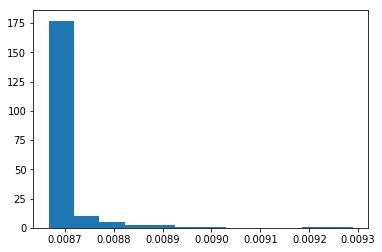

In [14]:
plt.hist(accs_test, bins=12)

In [3]:
## Reorganize the data set
import torch
import pandas as pd

# N is size of the training set; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H= 900, 6, 10

# Data
PT_data = pd.read_excel("../PTResults-1000.xlsx")
ices = np.zeros(175*1000)
for i in range(len(PT_data)):
    ice = PT_data.loc[i].iloc[7:len(PT_data.columns)]
    ices[i*175:(i+1)*175] = ice.values

PT_data = PT_data.iloc[np.repeat(np.arange(len(PT_data)), 175)]
drop_icol = list(range(6,len(PT_data.columns)))

PT_data = PT_data.drop(PT_data.columns[drop_icol],axis=1)
PT_data['loc'] = np.array(list(range(175))*1000)
PT_data['ice'] = ices
#print(PT_data)
PT_tensor = torch.tensor(PT_data.values)

#Eventually change to batch training and shuffle what is training
import torchvision
import torch.utils.data
#x_train, y_train = torch.utils.data.random_split(PT_tensor, [N, 1000-N])
x_train = PT_tensor[:N,1:-1].float()
y_train = PT_tensor[:N,-1].long()#.view(N,1)

x_test = PT_tensor[N:,1:-1].float()
y_test = PT_tensor[N:,-1].long()#.view(N,1)

D_out = 2#len(y_train[0,:])
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

torch.Size([900, 6]) torch.Size([174100, 6])
torch.Size([900]) torch.Size([174100])


In [4]:
def train(model_init):# Construct our model by instantiating the class defined above
    model = model_init

    # Construct our loss function and an Optimizer. The call to model.parameters()
    # in the SGD constructor will contain the learnable parameters of the two
    # nn.Linear modules which are members of the model.
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
    for t in range(100):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(x_train)

        # Compute and print loss
        #print(y_pred.shape, y_train.shape)
        loss = criterion(y_pred, y_train)
        #print(t, loss.item())
        # Zero gradients, perform a backward pass, and update the weights.
        if t == 1:
            optimizer.param_groups[0]['lr'] = 0.01
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Test accuracy 
    
    #print(y_pred, y_train)
  
    #print(y_pred, y_train)
    correct_train = ((torch.argmax(y_pred,dim=-1)==y_train)).sum()
    acc_train = correct_train.float()/y_train.shape[0]

    y_hat = model(x_test)
    correct_test = (torch.argmax(y_hat,dim=-1)==y_test).sum()
    print(correct_test)
    acc_test = correct_test.float()/y_test.shape[0]

    print('Training accuracy: ', acc_train.item())
    print('Testing accuracy: ', acc_test.item())
    return model,  acc_train.item(),acc_test.item()

In [7]:
# Run 1000 iterations of the training to get an average
accs_train = []
accs_test = []
for i in range(10):
    print('[Test number %i]' %(i))
    model_init = TwoLayerNet(D_in, H, D_out)
    model, acc_train, acc_test = train(model_init)
    accs_train.append(acc_train)
    accs_test.append(acc_test)

[Test number 0]
tensor(160776)
Training accuracy:  0.9611111283302307
Testing accuracy:  0.9234692454338074
[Test number 1]
tensor(159991)
Training accuracy:  0.9611111283302307
Testing accuracy:  0.9189603924751282
[Test number 2]
tensor(159315)
Training accuracy:  0.9599999785423279
Testing accuracy:  0.9150775671005249
[Test number 3]
tensor(130356)
Training accuracy:  0.8244444727897644
Testing accuracy:  0.7487421035766602
[Test number 4]
tensor(160586)
Training accuracy:  0.9622222185134888
Testing accuracy:  0.9223779439926147
[Test number 5]
tensor(160475)
Training accuracy:  0.95333331823349
Testing accuracy:  0.9217403531074524
[Test number 6]
tensor(159183)
Training accuracy:  0.9633333086967468
Testing accuracy:  0.9143193364143372
[Test number 7]
tensor(160951)
Training accuracy:  0.9599999785423279
Testing accuracy:  0.9244744181632996
[Test number 8]
tensor(158990)
Training accuracy:  0.9555555582046509
Testing accuracy:  0.9132108092308044
[Test number 9]
tensor(158777)

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 7.]),
 array([0.74864447, 0.76319597, 0.77774747, 0.79229897, 0.80685047,
        0.82140197, 0.83595347, 0.85050497, 0.86505648, 0.87960798,
        0.89415948, 0.90871098, 0.92326248]),
 <a list of 12 Patch objects>)

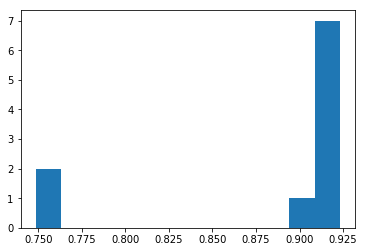

In [41]:
plt.hist(accs_test, bins=12)

In [1]:
## Reorganize the data set but no zero ones
import torch
import pandas as pd

# N is size of the training set; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H= 900, 6, 10

# Data
PT_data = pd.read_excel("../Data_Colleff_Entire (1).xlsx")
ices = np.zeros(175*1000)
for i in range(len(PT_data)):
    ice = PT_data.loc[i].iloc[7:len(PT_data.columns)]
    ices[i*175:(i+1)*175] = ice.values

PT_data = PT_data.iloc[np.repeat(np.arange(len(PT_data)), 175)]
drop_icol = list(range(6,len(PT_data.columns)))

PT_data = PT_data.drop(PT_data.columns[drop_icol],axis=1)
PT_data['loc'] = np.array(list(range(175))*1000)
PT_data['ice'] = ices
#print(PT_data)
PT_tensor = torch.tensor(PT_data.values)

#Eventually change to batch training and shuffle what is training
import torchvision
import torch.utils.data
#x_train, y_train = torch.utils.data.random_split(PT_tensor, [N, 1000-N])
x_train = PT_tensor[:N*175,1:-1].float()
y_train = PT_tensor[:N*175,-1].float()#.view(N,1)

x_test = PT_tensor[N*175:,1:-1].float()
y_test = PT_tensor[N*175:,-1].float()#.view(N,1)

D_out = 1#len(y_train[0,:])
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

NameError: name 'np' is not defined

In [70]:
def train(model_init):# Construct our model by instantiating the class defined above
    model = model_init

    # Construct our loss function and an Optimizer. The call to model.parameters()
    # in the SGD constructor will contain the learnable parameters of the two
    # nn.Linear modules which are members of the model.
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-12)
    for t in range(10):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(x_train)

        # Compute and print loss
        #print(y_pred.shape, y_train.shape)
        loss = criterion(y_pred, y_train)
        print(t, loss.item())
        # Zero gradients, perform a backward pass, and update the weights.
        if t == 1:
            optimizer.param_groups[0]['lr'] = 0.01
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Test accuracy 
    
    #print(y_pred, y_train)
  
    #print(y_pred, y_train)
    acc_train = criterion(y_pred,y_train)

    y_hat = model(x_test)
    acc_test = criterion(y_hat,y_test)

    
    print('Training loss: ', acc_train.item())
    print('Testing loss: ', acc_test.item())
    return model,  acc_train.item(),acc_test.item()




In [ ]:
# Run 1000 iterations of the training to get an average
accs_train = []
accs_test = []
for i in range(10):
    print('[Test number %i]' %(i))
    model_init = TwoLayerNet(D_in, H, D_out)
    model, acc_train, acc_test = train(model_init)
    accs_train.append(acc_train)
    accs_test.append(acc_test)

[Test number 0]
0 0.6543065905570984


(array([2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.03773526, 0.04399185, 0.05024844, 0.05650503, 0.06276162,
        0.06901821, 0.0752748 , 0.08153139, 0.08778797, 0.09404456,
        0.10030115, 0.10655774, 0.11281433]),
 <a list of 12 Patch objects>)

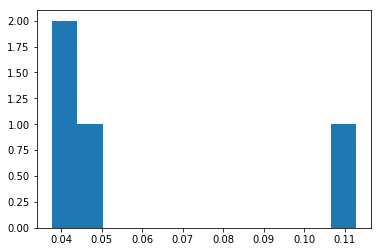

In [24]:
plt.hist(accs_test, bins=12)

## Anabel's plot

In [68]:
print(PT_tensor)

tensor([[0.0000e+00, 2.4983e+02, 7.2032e+00,  ..., 5.2107e-01, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 2.4983e+02, 7.2032e+00,  ..., 5.2107e-01, 1.0000e+00,
         0.0000e+00],
        [0.0000e+00, 2.4983e+02, 7.2032e+00,  ..., 5.2107e-01, 2.0000e+00,
         0.0000e+00],
        ...,
        [9.9900e+02, 2.4444e+02, 5.1776e+00,  ..., 6.0651e-01, 1.7200e+02,
         0.0000e+00],
        [9.9900e+02, 2.4444e+02, 5.1776e+00,  ..., 6.0651e-01, 1.7300e+02,
         0.0000e+00],
        [9.9900e+02, 2.4444e+02, 5.1776e+00,  ..., 6.0651e-01, 1.7400e+02,
         0.0000e+00]], dtype=torch.float64)


In [35]:
abscissa = pd.read_excel("../Data_Colleff_Entire (1).xlsx").columns[7:].tolist()
print(len(abscissa), abscissa[0], abscissa[-1])

175 0.00847867126218693 0.9971741078954962


In [67]:
y_hat = model(x_test)
#print(y_hat, y_test)
print(x_test)
print(x_test.numpy())
print(np.sort(x_test.numpy(),axis=0))

tensor([[2.6893e+02, 8.5044e-01, 3.1953e-01, 1.6793e-05, 1.1245e+00, 2.5000e+01],
        [2.6893e+02, 8.5044e-01, 3.1953e-01, 1.6793e-05, 1.1245e+00, 2.6000e+01],
        [2.6893e+02, 8.5044e-01, 3.1953e-01, 1.6793e-05, 1.1245e+00, 2.7000e+01],
        ...,
        [2.4444e+02, 5.1776e+00, 4.6408e-01, 4.9672e-05, 6.0651e-01, 1.7200e+02],
        [2.4444e+02, 5.1776e+00, 4.6408e-01, 4.9672e-05, 6.0651e-01, 1.7300e+02],
        [2.4444e+02, 5.1776e+00, 4.6408e-01, 4.9672e-05, 6.0651e-01, 1.7400e+02]])
[[2.6893427e+02 8.5044211e-01 3.1952739e-01 1.6793218e-05 1.1244676e+00
  2.5000000e+01]
 [2.6893427e+02 8.5044211e-01 3.1952739e-01 1.6793218e-05 1.1244676e+00
  2.6000000e+01]
 [2.6893427e+02 8.5044211e-01 3.1952739e-01 1.6793218e-05 1.1244676e+00
  2.7000000e+01]
 ...
 [2.4444402e+02 5.1775527e+00 4.6408129e-01 4.9672046e-05 6.0651124e-01
  1.7200000e+02]
 [2.4444402e+02 5.1775527e+00 4.6408129e-01 4.9672046e-05 6.0651124e-01
  1.7300000e+02]
 [2.4444402e+02 5.1775527e+00 4.6408129e-01 

In [36]:
## Abscissa specific errors

prec_error_3 = np.zeros(175)
for i in range(175):
    i

prec_error_3 = 
print(x_test)


tensor([[2.6893e+02, 8.5044e-01, 3.1953e-01, 1.6793e-05, 1.1245e+00, 2.5000e+01],
        [2.6893e+02, 8.5044e-01, 3.1953e-01, 1.6793e-05, 1.1245e+00, 2.6000e+01],
        [2.6893e+02, 8.5044e-01, 3.1953e-01, 1.6793e-05, 1.1245e+00, 2.7000e+01],
        ...,
        [2.4444e+02, 5.1776e+00, 4.6408e-01, 4.9672e-05, 6.0651e-01, 1.7200e+02],
        [2.4444e+02, 5.1776e+00, 4.6408e-01, 4.9672e-05, 6.0651e-01, 1.7300e+02],
        [2.4444e+02, 5.1776e+00, 4.6408e-01, 4.9672e-05, 6.0651e-01, 1.7400e+02]])


In [ ]:
##################################

## PLOTTING RESULTS ##

plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)

plt.plot(abscissa, prec_error_3,color='green',label='Tree depth 3')
plt.fill_between(abscissa, prec_error_3-prec_errstd_3, prec_error_3+prec_errstd_3,
        alpha=0.5,color='#e0e0e0')

plt.xlabel(r'\textbf{Abscissa}',fontsize=12)
plt.ylabel(r'\textbf{Precision} [\%]',fontsize=16)
plt.ylim(-0.5,105)
plt.legend()

plt.show()

